<a href="https://colab.research.google.com/github/samarjahanahmedburney/Wild_Blueberry_Yield_Predictionbysamar-/blob/main/Wild_Blueberry_Yield_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Project Title: Wild Blueberry Pollination Simulation Model***



*   Author: Samar Jahan Burney
*   Email: samarjahanahmedburney@gmail.com





# **Objectives**

# our main goals of the simulation model is predicting pollination.

# Libraries and Tools Used

NumPy & Pandas: For data manipulation and numerical computations.

Matplotlib & Seaborn: For data visualization and EDA.

Scikit-learn: For preprocessing, model building, evaluation, and hyperparameter tuning.

XGBoost: For advanced ensemble regression modeling.

Pipeline & ColumnTransformer: To streamline preprocessing and modeling steps.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# **7days plan**

# **1Day**

**1. Data Collecting & Loading**

In [ ]:
print("Data Loaded Successfully")
data = pd.read_csv("/content/sample_data/WildBlueberryPollinationSimulationData.csv")
display(data.head())

Data Loaded Successfully


,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [ ]:
print("Dataset Shape:")
display(data.shape)

Dataset Shape:


(777, 18)

In [ ]:
display(data.columns)

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [ ]:
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass

In [ ]:
print("Statistical Summary:")
print(data.describe())

Statistical Summary:
             Row#   clonesize    honeybee     bumbles     andrena       osmia  \
count  777.000000  777.000000  777.000000  777.000000  777.000000  777.000000   
mean   388.000000   18.767696    0.417133    0.282389    0.468817    0.562062   
std    224.444871    6.999063    0.978904    0.066343    0.161052    0.169119   
min      0.000000   10.000000    0.000000    0.000000    0.000000    0.000000   
25%    194.000000   12.500000    0.250000    0.250000    0.380000    0.500000   
50%    388.000000   12.500000    0.250000    0.250000    0.500000    0.630000   
75%    582.000000   25.000000    0.500000    0.380000    0.630000    0.750000   
max    776.000000   40.000000   18.430000    0.585000    0.750000    0.750000   

       MaxOfUpperTRange  MinOfUpperTRange  AverageOfUpperTRange  \
count        777.000000        777.000000            777.000000   
mean          82.277091         49.700515             68.723037   
std            9.193745          5.595769       

In [ ]:
print("Checking for Missing Values:")
data.isnull().sum()

Checking for Missing Values:


,0
Row#,0
clonesize,0
honeybee,0
bumbles,0
andrena,0
osmia,0
MaxOfUpperTRange,0
MinOfUpperTRange,0
AverageOfUpperTRange,0
MaxOfLowerTRange,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.describe(include="all")

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


# **Exploratory Data Analysis (EDA)**

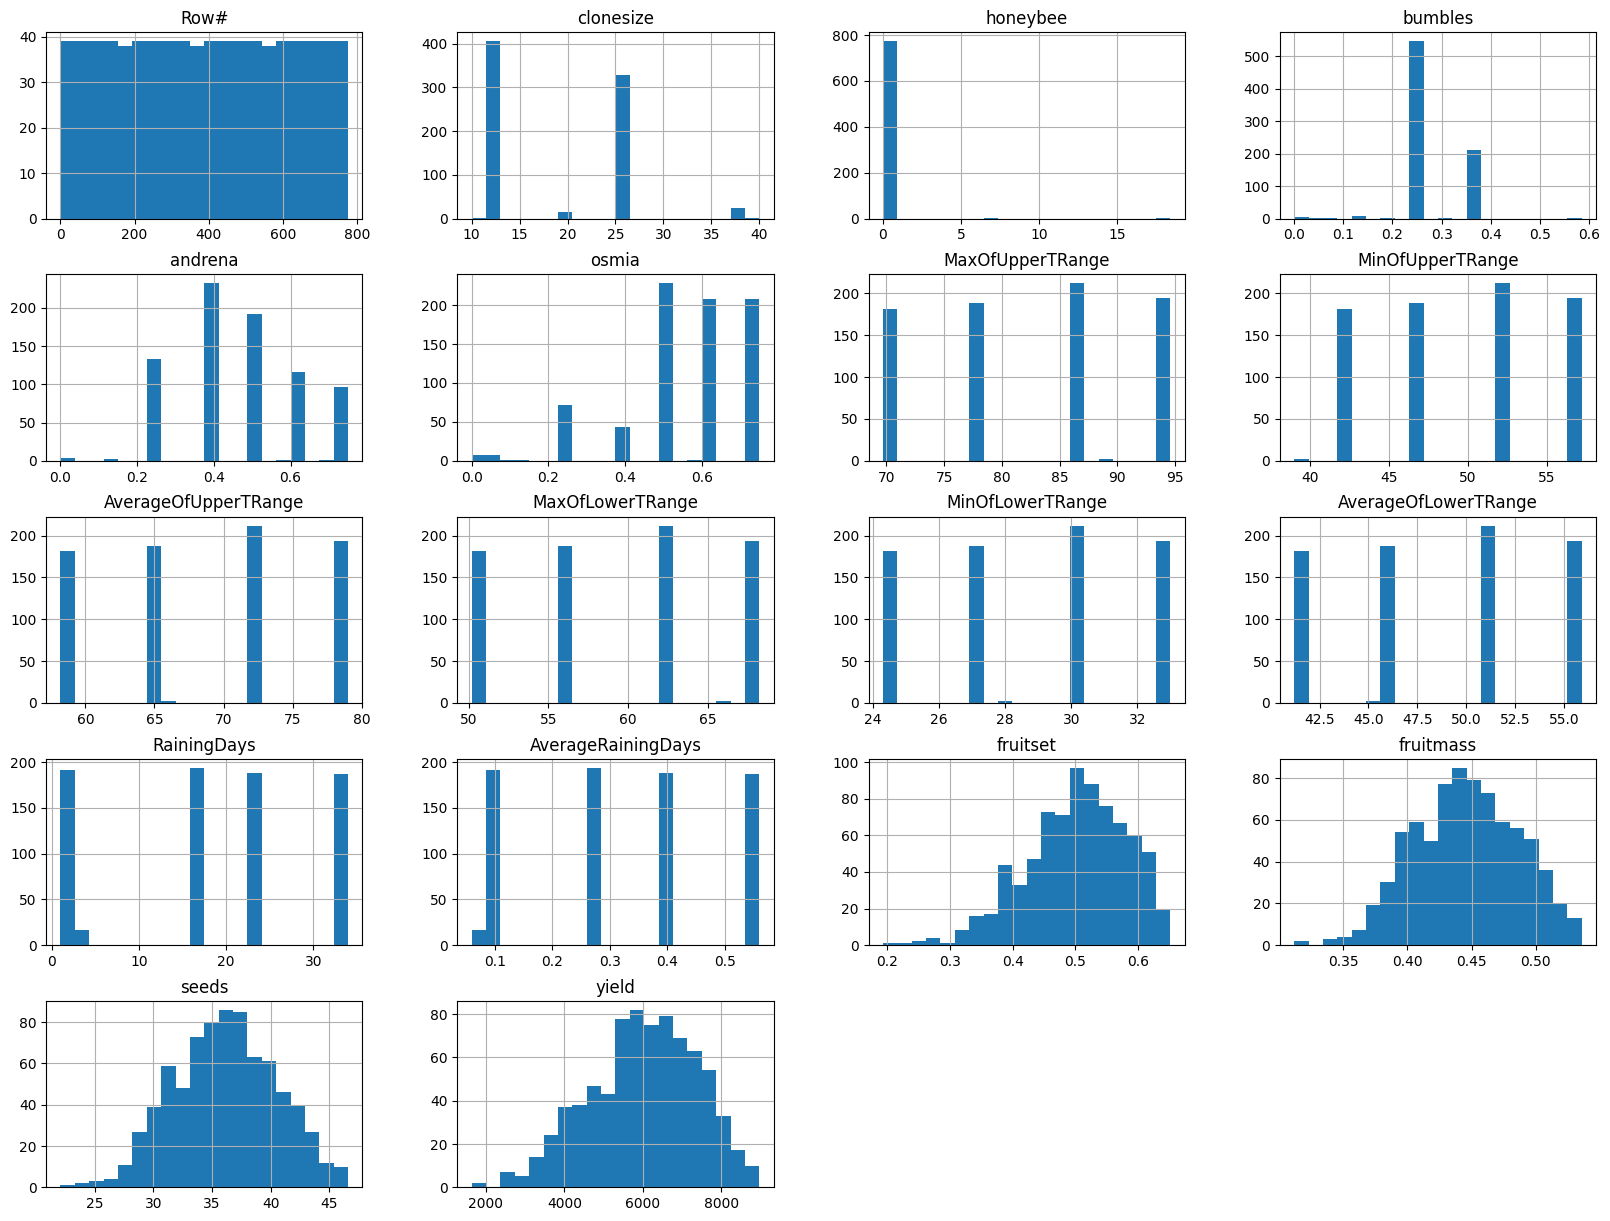

In [ ]:
data.hist(layout=(5,4), figsize=(20,15), bins=20)
plt.show()

# **2day**

## visualize data using a heatmap

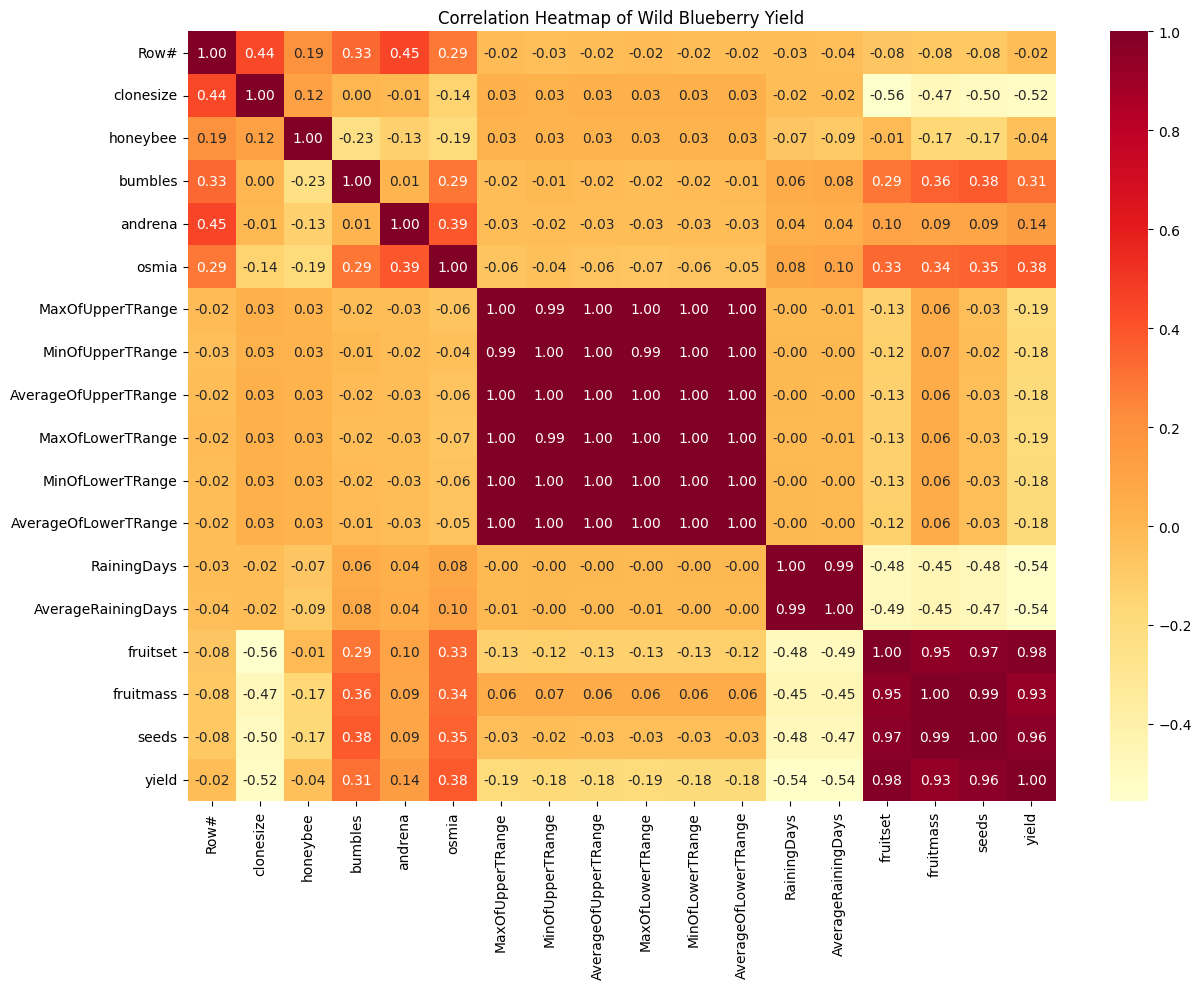

In [ ]:
correlation = data.corr()
plt.figure(figsize=(14,10))

sns.heatmap(correlation,annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Correlation Heatmap of Wild Blueberry Yield")
plt.show()

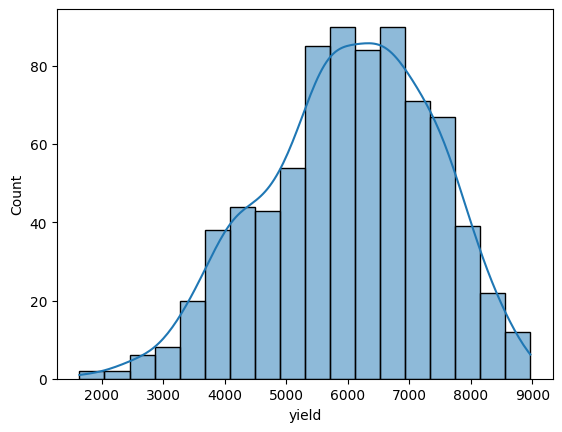

In [ ]:
sns.histplot(data['yield'],kde=True)
plt.show()

**Feature analysis**

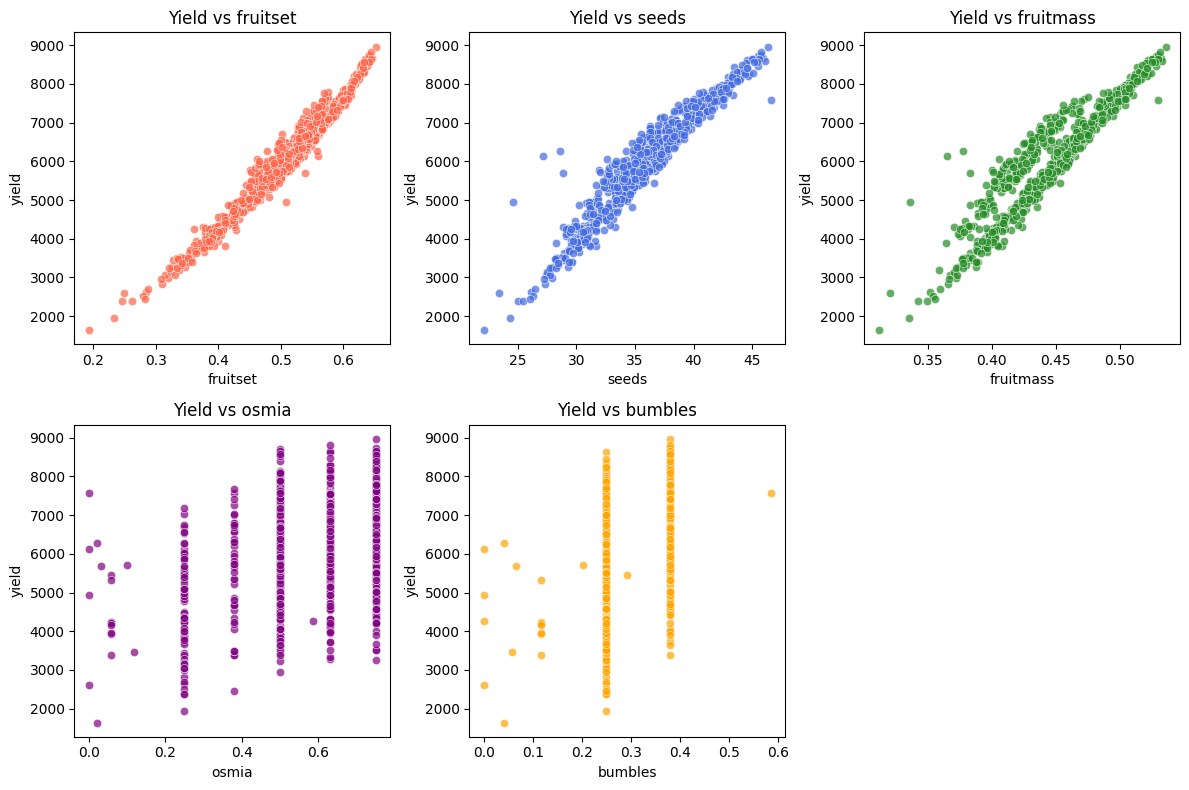

In [ ]:
top_features = ['fruitset', 'seeds', 'fruitmass', 'osmia', 'bumbles']

plt.figure(figsize=(12,8))
colors = ['tomato', 'royalblue', 'forestgreen', 'purple', 'orange']
for i, (feature, color) in enumerate(zip(top_features, colors), 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=data[feature], y=data['yield'], color=color, alpha=0.7)
    plt.title(f'Yield vs {feature}')
plt.tight_layout()
plt.show()

## Feature Analysis Of Bee

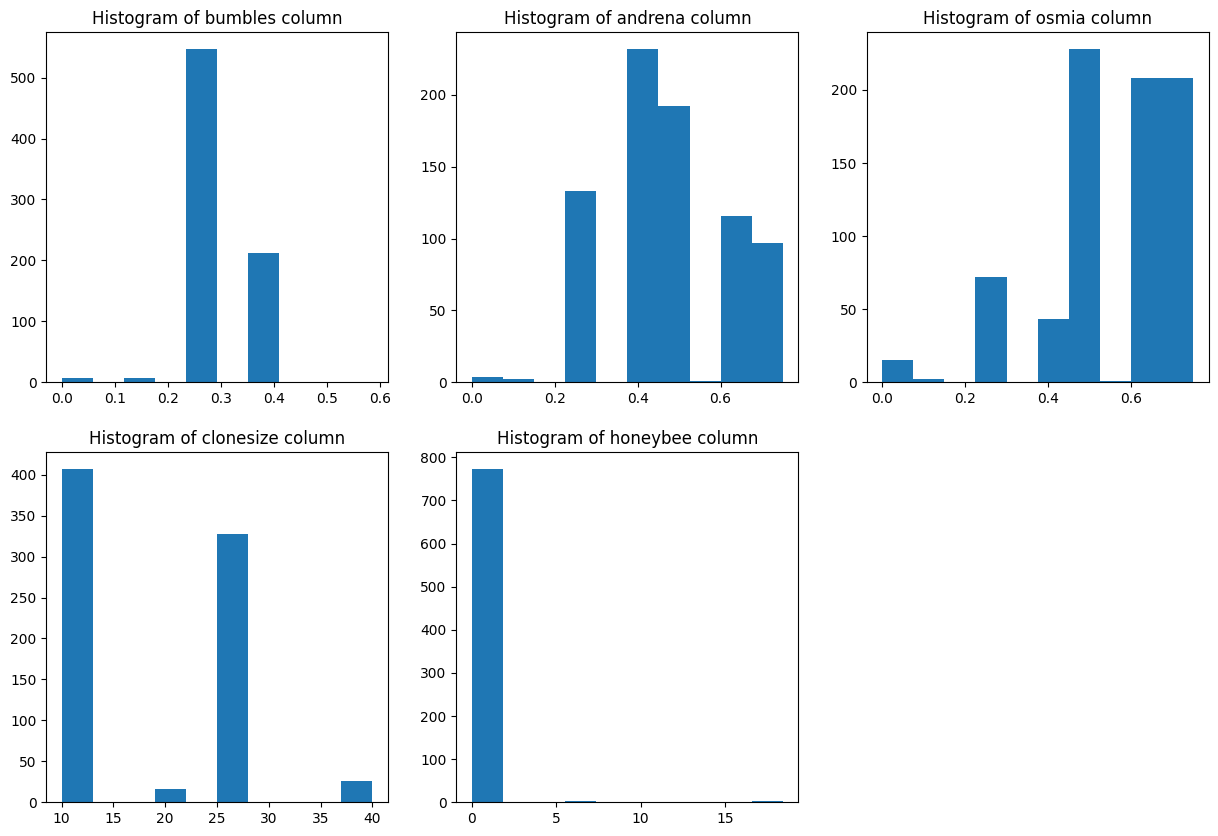

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(data['bumbles'])
plt.title("Histogram of bumbles column")
plt.subplot(2,3,2)
plt.hist(data['andrena'])
plt.title("Histogram of andrena column")
plt.subplot(2,3,3)
plt.hist(data['osmia'])
plt.title("Histogram of osmia column")
plt.subplot(2,3,4)
plt.hist(data['clonesize'])
plt.title("Histogram of clonesize column")
plt.subplot(2,3,5)
plt.hist(data['honeybee'])
plt.title("Histogram of honeybee column")
plt.show()

# **Outlier Detection Using Boxplots**

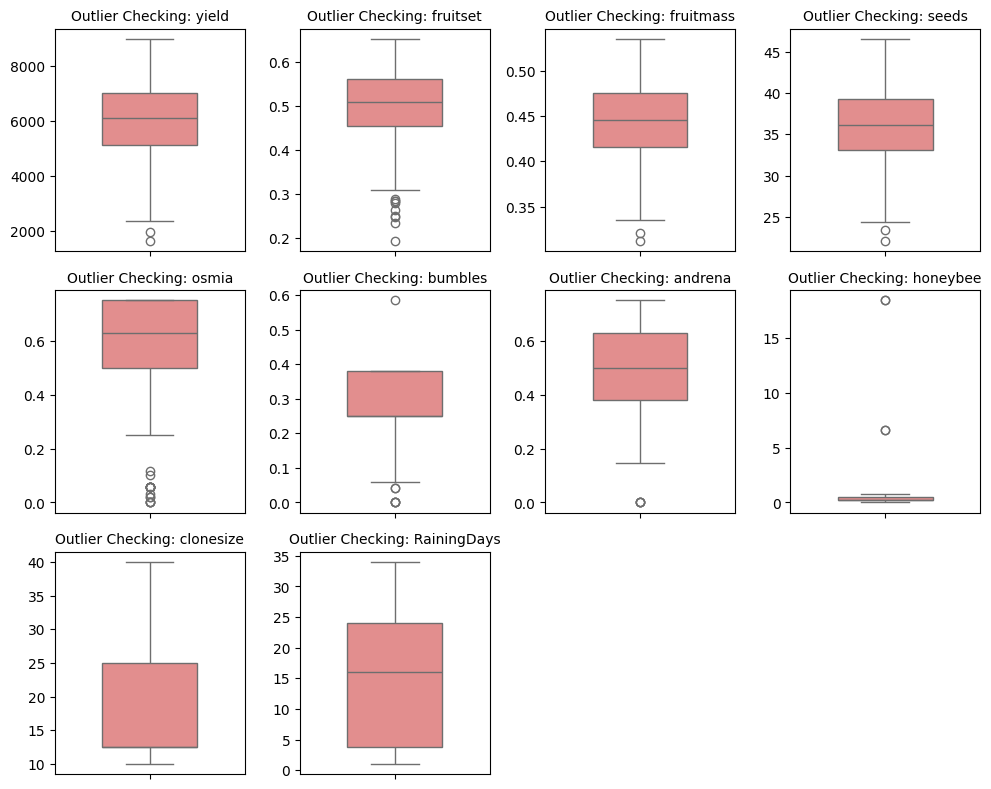

In [ ]:
num_cols = ['yield', 'fruitset', 'fruitmass', 'seeds',
            'osmia', 'bumbles', 'andrena', 'honeybee',
            'clonesize', 'RainingDays']

plt.figure(figsize=(10, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=data, y=col, color='lightcoral', width=0.5)
    plt.title(f'Outlier Checking: {col}', fontsize=10)
    plt.ylabel('')
plt.tight_layout()
plt.show()

# **3day**

# **Data Preprocessing**

**Feature-Target Separation**

In [ ]:
X = data.drop(columns=['yield'])
y = data[['yield']]

**Outlier Removal using IQR Method**

In [ ]:
def remove_outliers_iqr(data, cols):
    data_clean = data.copy()
    for col in cols:
        Q1 = data_clean[col].quantile(0.25)
        Q3 = data_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Keep only rows within the bounds
        data_clean = data_clean[(data_clean[col] >= lower_bound) & (data_clean[col] <= upper_bound)]

    # Reset index once after filtering all columns
    data_clean = data_clean.reset_index(drop=True)
    return data_clean


# Apply function
num_cols = data.select_dtypes(include=['float64']).columns
data_clean = remove_outliers_iqr(data, num_cols)

print(f"Before: {data.shape[0]} rows → After outlier removal: {data_clean.shape[0]} rows")
data_clean.head()

Before: 777 rows → After outlier removal: 752 rows


,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


**Identifying Top Features Correlated with Yield**

In [ ]:
corr_target =data.corr()["yield"].sort_values(ascending=False)
print("Top correlated features with yield:\n", corr_target)

Top correlated features with yield:
 yield                   1.000000
fruitset                0.984081
seeds                   0.961249
fruitmass               0.930365
osmia                   0.380892
bumbles                 0.309407
andrena                 0.140277
Row#                   -0.024942
honeybee               -0.044250
MinOfUpperTRange       -0.175883
AverageOfLowerTRange   -0.181293
AverageOfUpperTRange   -0.181774
MinOfLowerTRange       -0.183339
MaxOfUpperTRange       -0.187075
MaxOfLowerTRange       -0.187439
clonesize              -0.516737
RainingDays            -0.540069
AverageRainingDays     -0.541215
Name: yield, dtype: float64


**Function: Find Highly Correlated Features**

In [ ]:
def find_correlated_features(dataset, threshold=0.7):
    """
    Returns a set of column names that are highly correlated
    (above the given threshold).
    """
    col_corr = set()  # Set to hold correlated feature names
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr
corr_features = find_correlated_features(data.drop(columns=["yield"]), threshold=0.7)
print(f"({len(corr_features)}):\n", corr_features)

(8):
 {'seeds', 'AverageOfUpperTRange', 'MinOfLowerTRange', 'MinOfUpperTRange', 'MaxOfLowerTRange', 'AverageOfLowerTRange', 'fruitmass', 'AverageRainingDays'}


# **4day**

**Feature Selection and Train-Test Split**

In [ ]:
# Drop feature
X = data.drop(columns=corr_features.union({"yield"}), errors="ignore")
y = data["yield"]

#Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n✅ Train shape: {X_train.shape}, Test shape: {X_test.shape}")


✅ Train shape: (621, 9), Test shape: (156, 9)


In [ ]:
X_train.shape

(621, 9)

In [ ]:
print(X_train.columns.tolist())

['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'RainingDays', 'fruitset']


In [ ]:
print(X_train.columns.tolist())

['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'RainingDays', 'fruitset']


In [ ]:
X_test.shape

(156, 9)

In [ ]:
X.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset
0,0,37.5,0.75,0.25,0.25,0.25,86.0,16.0,0.410652
1,1,37.5,0.75,0.25,0.25,0.25,86.0,1.0,0.444254
2,2,37.5,0.75,0.25,0.25,0.25,94.6,16.0,0.383787
3,3,37.5,0.75,0.25,0.25,0.25,94.6,1.0,0.407564
4,4,37.5,0.75,0.25,0.25,0.25,86.0,24.0,0.354413


In [ ]:
y.head()

,yield
0,3813.165795
1,4947.605663
2,3866.798965
3,4303.943030
4,3436.493543


# **5day**

**Detecting Highly Correlated Features**

In [ ]:
#upper triangle of the correlation matrix.
def find_correlated_features(data, threshold=0.7):
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    return [column for column in upper.columns if any(upper[column] > threshold)]

# Example usage
corr_target = find_correlated_features(X_train, 0.7)
print("Total correlated features:", len(set(corr_target)))

Total correlated features: 0


**Feature Grouping for PCA**

In [ ]:
fruit_features = ["fruitset"] # fruitmass and seeds were dropped
bee_features   = ["honeybee", "bumbles", "andrena", "osmia"]
temp_features  = ["MaxOfUpperTRange"] # all other temp features were dropped
other_numeric  = ["clonesize", "RainingDays", "Row#"]

**PCA Helping Function**

In [ ]:
def make_pca_pipe():
    """Helper function for scaling + PCA (1 component)."""
    return Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=1, random_state=42))
    ])
#PCA Pipelines

fruit_pipe = make_pca_pipe()
bee_pipe   = make_pca_pipe()
temp_pipe  = make_pca_pipe()
other_numeric_pipe = make_pca_pipe()


**Feature Preprocessing and Model Setup**

In [ ]:
#Preprocessor
preprocessor = ColumnTransformer([
    ('fruit_pca', fruit_pipe, fruit_features),
    ('bee_pca',   bee_pipe,   bee_features),
    ('temp_pca',  temp_pipe,  temp_features),
    ('num', StandardScaler(), temp_features + other_numeric) # Scale remaining numeric features
], remainder='drop')

#Base Models
base_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, eval_metric="rmse")
}

**end-to-end pipelines for each model**

In [ ]:
#Combine Preprocessor + regressor
models = {
    name: Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    for name, model in base_models.items()
}

#model evaluation function
def evaluate_model(model, X_test, y_test):
    """Compute RMSE, MAE, and R² for a regression model."""
    y_pred = model.predict(X_test)
    return (
        np.sqrt(mean_squared_error(y_test, y_pred)),  # RMSE
        mean_absolute_error(y_test, y_pred),          # MAE
        r2_score(y_test, y_pred)                      # R²
    )

In [ ]:
#Train & Evaluate Each Model
results = []

for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    rmse, mae, r2 = evaluate_model(pipeline, X_test, y_test)

    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    })
print("Model Performance Summary:")
print(f"{name:<20} → RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.3f}")

Model Performance Summary:
XGBoost              → RMSE: 149.91, MAE: 117.77, R²: 0.988


**Model Performance Comparison**

In [ ]:
#Create Comparison Table
results_data = (
    pd.DataFrame(results)
      .sort_values(by="RMSE", ascending=True)
      .reset_index(drop=True)
)

print("Model Performance Comparison:")
print(results_data)

Model Performance Comparison:
               Model        RMSE         MAE        R²
0  Gradient Boosting  123.540374   97.087767  0.992148
1            XGBoost  149.909630  117.766398  0.988438
2      Random Forest  152.033741  111.688121  0.988108
3  Linear Regression  165.531590  123.386471  0.985902
4      Decision Tree  184.044687  140.036304  0.982573


# **6day**

**visual comparison of models based on RMSE**

/tmp/ipython-input-3317980881.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="RMSE", y="Model", data=results_data, palette="viridis")


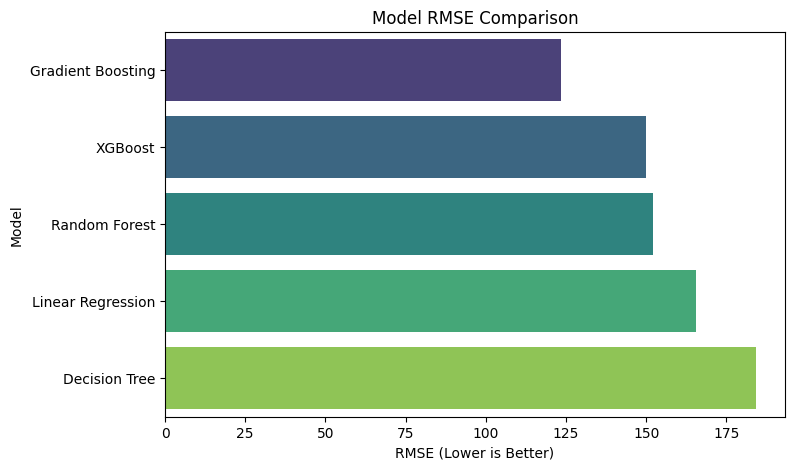

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x="RMSE", y="Model", data=results_data, palette="viridis")
plt.title("Model RMSE Comparison")
plt.xlabel("RMSE (Lower is Better)")
plt.ylabel("Model")
plt.show()

**line plot of RMSE for each model**

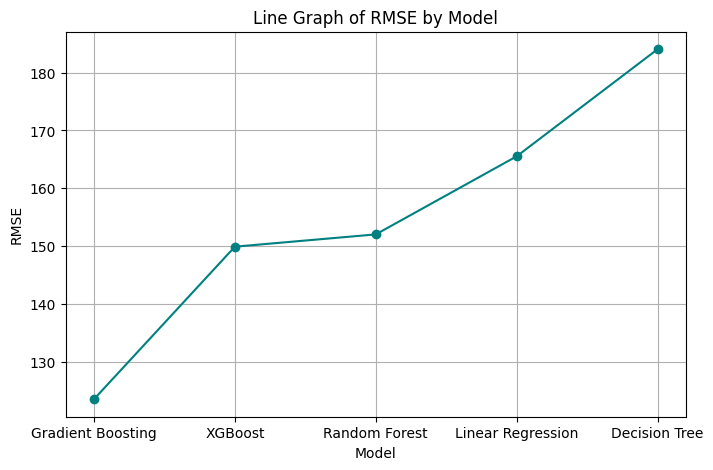

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(results_data["Model"], results_data["RMSE"], marker='o', linestyle='-', color='teal')
plt.title("Line Graph of RMSE by Model")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()

In [ ]:
print("Model Performance Summary:")
display(results_data)

Model Performance Summary:


,Model,RMSE,MAE,R²
0,Gradient Boosting,123.540374,97.087767,0.992148
1,XGBoost,149.909630,117.766398,0.988438
2,Random Forest,152.033741,111.688121,0.988108
3,Linear Regression,165.531590,123.386471,0.985902
4,Decision Tree,184.044687,140.036304,0.982573
